In [74]:
import numpy as np
import seaborn as sns
from scipy.linalg import cholesky
from matplotlib import pyplot as plt
%matplotlib inline

In [80]:
def generate_sample(mean, var, corr, n):
    cov_matrix = np.asarray([[var[0], corr * np.sqrt(var[0] * var[1])],
                             [corr * np.sqrt(var[0] * var[1]), var[1]]])
    C = cholesky(cov_matrix)
    x = np.random.normal(0.0, 1.0, size=(n, 2))
    shift = np.zeros((n, 2))
    for i in range(n):
        shift[i, 0] = mean[0]
        shift[i, 1] = mean[1]
    
    sample = x @ C + shift
    
    return sample

In [93]:
def estimate(e, sigma, corr, lim=1000):
    est = []
    sample = generate_sample(e, sigma, corr, 500000)
    est_correct = np.mean(sample[:, 0] / sample[:, 1])
    print(est_correct)
    for n in range(1, lim, 10):
        sample = generate_sample(e, sigma, corr, n)
        est.append(abs(np.mean(sample[:, 0]) / np.mean(sample[:, 1]) - est_correct))
    
    plt.figure(figsize=(10, 7))
    plt.title("Модуль разности между оценкой mean(x) / mean(y) и истинным значением E(x / y)")
    plt.plot([i for i in range(1, lim, 10)], est)
    plt.xlabel("Размер выборки")
    plt.show()

Для двумерного нормального распределения $(x, y)$, где $x \sim \mathcal{N}(6, 1)$, $y \sim \mathcal{N}(-2, 0.5)$, $corr(x, y) = 0.7$, были сгенерированы случайные выборки размером от $1$ до $1000$ с шагом $10$. Для каждой выборки сравнивалось отношение $\frac{\bar{x}}{\bar{y}}$ и выборочное среднее для $\frac{x}{y}$. В результате получилось, что эти оценки не совпадают. Так как выборочное среднее для $\frac{x}{y}$ в пределе стремится к $\mathbb{E}\frac{x}{y}$, оценку $\frac{\bar{x}}{\bar{y}}$ можно считать несостоятельной для $\mathbb{E}\frac{x}{y}$

-3.92341093174


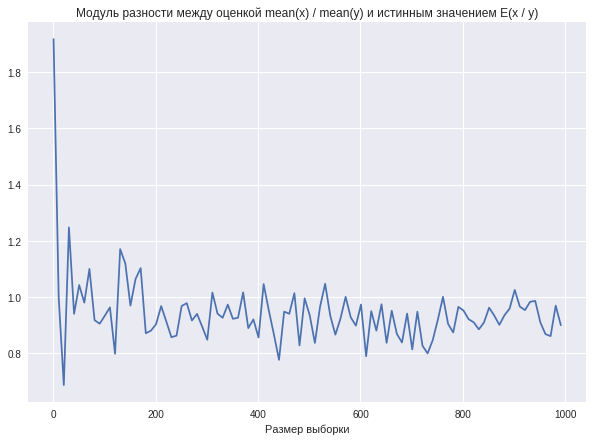

In [116]:
estimate([6, -2], [1, 0.5], 0.7)